<a href="https://colab.research.google.com/github/victorsamsara/devasc/blob/master/6_1_advanced_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study 6.1 - NYC Taxi Trips

<h1 style="color:red;">Note: If you close this notebook at any time, you will have to run all cells again upon re-opening it.</h1>

<h1 style="color:red;">Note: You may get different numerical results running the notebook different times. This is to be expected, you can just report whatever results you get.</h1>

# ADVANCED PYTHON

As this is an advanced version, we don't include a lot of code here. If you get stuck on a particular part, feel free to also use the beginner version in `beginnner_python.ipynb` to help you out.

# Identification Information

You can find your MITxPro username on this [page](https://courses.xpro.mit.edu/courses/course-v1:xPRO+DSx+R14/progress) and copying the username in quotations after it says "Student". For example, Kevin's username is "kevin-lyons".

**Please use the correct username and the e-mail address right next to it as it makes it much easier for course staff to identify your notebook.**

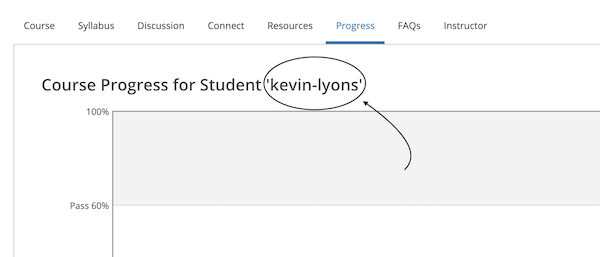

**YOUR NAME**              = Victor Nicolas Gonzalez Alcantara

**YOUR MITX PRO USERNAME** = victor-nicolas-gonzalez-alcant

**YOUR MITX PRO E-MAIL**   = victor@samsara.com

# Setup

Run these cells to install all the packages you need to complete the remainder of the case study. This may take a few minutes, so please be patient.

<h1 style="color:red;">Note: You may see red errors when you run the cell below. As long as you can run the Import cell below and see "Import successful!", you can continue with the case study.</h1>

In [ ]:
!pip install -q --upgrade pip
!pip install -q featuretools==0.1.19 --use-feature=2020-resolver
!pip uninstall -y pandas
!pip install -q pandas==0.20.3 --use-feature=2020-resolver
print('Install successful!')

     |████████████████████████████████| 1.5MB 2.8MB/s 
     |████████████████████████████████| 133 kB 3.7 MB/s 
     |████████████████████████████████| 178 kB 20.0 MB/s 
     |████████████████████████████████| 91 kB 7.3 MB/s 
     |████████████████████████████████| 45 kB 2.4 MB/s 
     |████████████████████████████████| 1.3 MB 43.0 MB/s 
     |████████████████████████████████| 6.5 MB 15.5 MB/s 
     |████████████████████████████████| 141 kB 53.4 MB/s 
     |████████████████████████████████| 295 kB 62.8 MB/s 
     |████████████████████████████████| 547 kB 44.9 MB/s 
ERROR: datascience 0.10.6 requires folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
Found existing installation: pandas 1.1.4
Uninstalling pandas-1.1.4:
  Successfully uninstalled pandas-1.1.4
     |████████████████████████████████| 24.5 MB 1.3 MB/s 
ERROR: xarray 0.15.1 requires pandas>=0.25, but you'll have pandas 0.20.3 which is incompatible.
seaborn 0.11.0 requires pandas>=0.23, but you'll have pandas 0

<h1>Now, you have to restart the runtime by clicking Runtime > Restart Runtime at the top of the page. This will ensure our changes take effect.</h1>

# Import

In [ ]:
from google.colab import auth
auth.authenticate_user()

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
data_drop = drive.CreateFile({'id':'1OtzpLNq_s8UtWQgPXJEQX6ejJ92lEwkH'})
data_drop.GetContentFile('dropoff_neighborhoods.csv')
data_pick = drive.CreateFile({'id':'1CE8P9xjJYirrE3sN3xPp-Cc9wKYoNGxU'})
data_pick.GetContentFile('pickup_neighborhoods.csv')
data_trips = drive.CreateFile({'id':'19kUSme4S1hfcUJn3JovQd_mvw54il1QI'})
data_trips.GetContentFile('trips.pkl')
utils_file = drive.CreateFile({'id':'1_2324HvTia9NVkKY-j4RgWncct6gVnyi'})
utils_file.GetContentFile('utils.py')

In [ ]:
import featuretools as ft
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import utils
from featuretools.primitives import (Count, Day, Hour, Max, Mean, Median, Min,
                                     Minute, Month, Std, Sum, Week, Weekday,
                                     Weekend)
from sklearn.ensemble import GradientBoostingRegressor
from utils import (compute_features, feature_importances, load_nyc_taxi_data,
                   preview)
from sklearn.metrics import mean_squared_error

In [ ]:
%matplotlib inline

# Data

- Use `load_nyc_taxi_data` to get the data.
- Use `preview` to preview the data.
- Create a histogram of the `trip_duration` column of the `trips` table.

        id  vendor_id     pickup_datetime    dropoff_datetime  \
0   514030          2 2016-04-02 00:00:00 2016-04-02 00:17:00   
1   514031          1 2016-04-02 00:00:00 2016-04-02 00:24:00   
2   514032          1 2016-04-02 00:00:00 2016-04-02 00:19:00   
3   514033          2 2016-04-02 00:00:00 2016-04-02 00:01:00   
4   514034          1 2016-04-02 00:01:00 2016-04-02 00:58:00   
5   514035          1 2016-04-02 00:01:00 2016-04-02 00:09:00   
6   514036          1 2016-04-02 00:01:00 2016-04-02 00:05:00   
7   514037          1 2016-04-02 00:01:00 2016-04-02 00:20:00   
8   514038          1 2016-04-02 00:01:00 2016-04-02 00:10:00   
9   514039          1 2016-04-02 00:01:00 2016-04-02 00:17:00   
10  514040          1 2016-04-02 00:01:00 2016-04-02 00:13:00   
11  514041          2 2016-04-02 00:02:00 2016-04-02 00:11:00   
12  514042          2 2016-04-02 00:02:00 2016-04-02 00:12:00   
13  514043          1 2016-04-02 00:02:00 2016-04-02 00:17:00   
14  514044          2 201

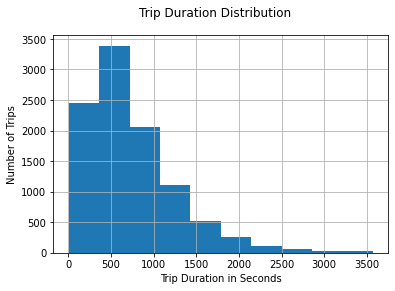

10000
Mean = 746.0989


In [ ]:
"""
utils library

def load_nyc_taxi_data():
    trips = pd.read_pickle('trips.pkl')
    trips["payment_type"] = trips["payment_type"].apply(str)
    trips = trips.dropna(axis=0, how='any', subset=['trip_duration'])

    pickup_neighborhoods = pd.read_csv(
        "pickup_neighborhoods.csv", encoding='utf-8')
    dropoff_neighborhoods = pd.read_csv(
        "dropoff_neighborhoods.csv", encoding='utf-8')
    
    # cutoff_time = trips[['id', 'pickup_datetime']]
    # cutoff_time.pickup_datetime = pd.to_numeric(cutoff_time.pickup_datetime)

    return trips, pickup_neighborhoods, dropoff_neighborhoods

def preview(df, n=5):
    #return n rows that have fewest number of nulls
    order = df.isnull().sum(axis=1).sort_values(kind='mergesort').head(n).index
    return df.loc[order]

"""

#Get the data
trips, pickupNeighborhoods, dropoffNeighborhoods = load_nyc_taxi_data()

#Preview the data
print(preview(trips, 20))

#Create histogram
trips.trip_duration.hist()
plt.xlabel('Trip Duration in Seconds')
plt.ylabel('Number of Trips')
plt.suptitle('Trip Duration Distribution')
plt.show()

#Number of trips
print(len(trips))

#Description of distribution
print("Mean =",trips.trip_duration.mean())

<h1 style="color:red;">QUESTION 1: DATA ANALYSIS</h1>

**Describe the dataset. How many trips are in the dataset? How would you describe the distribution of trip durations? Is there anything else we should observe? Make sure the histogram is visible in the notebook.**

There are 10000 trips in the dataset. The distribtion of the trips duration is positively skewed, with a mean of ~746 seconds. From the histogram when can see that the majority of the trips roughly last between 300 and 600 seconds.

# Entities and Relationships

Construct a dictionary of entities and relationships. You can read about the format of these objects [`here`](https://docs.featuretools.com/en/stable/generated/featuretools.dfs.html).

In [ ]:
# Construct entities and relationships dicts

"""
entities (dict[str -> tuple(pd.DataFrame, str, str, dict[str -> Variable])]) – dictionary of entities. 
Entries take the format {entity id -> (dataframe, id column, (time_column), (variable_types))}. 
Note that time_column and variable_types are optional.

relationships (list[(str, str, str, str)]) – List of relationships between entities. 
List items are a tuple with the format (parent entity id, parent variable, child entity id, child variable).
"""

entities = {
    "trips": (trips, "id", 'pickup_datetime'),
    "pickupNeighborhoods": (pickupNeighborhoods, "neighborhood_id"),
    "dropoffNeighborhoods": (dropoffNeighborhoods, "neighborhood_id"),
}

relationships = [("pickupNeighborhoods", "neighborhood_id", "trips", "pickup_neighborhood"),
                 ("dropoffNeighborhoods", "neighborhood_id", "trips", "dropoff_neighborhood")]


# Transform Primitives

In [ ]:
# Make list of transform primtivies that only contains the Weekend object from above

transformPrimitives = [Weekend]


In [ ]:
# Then, use featuretools.dfs to get the features
# See https://docs.featuretools.com/generated/featuretools.dfs.html
# target entity should match name for trips entity in your entities dictionary
# no agg_primitives yet
# ignore the lat/long for dropoff and pickup

"""
entities (dict[str -> tuple(pd.DataFrame, str, str, dict[str -> Variable])]) – dictionary of entities. 
Entries take the format {entity id -> (dataframe, id column, (time_column), (variable_types))}. Note that time_column and variable_types are optional.

relationships (list[(str, str, str, str)]) – List of relationships between entities. 
List items are a tuple with the format (parent entity id, parent variable, child entity id, child variable).

target_entity (str) – Entity id of entity on which to make predictions.

agg_primitives (list[str or AggregationPrimitive], optional) –

List of Aggregation Feature types to apply.
Default: [“sum”, “std”, “max”, “skew”, “min”, “mean”, “count”, “percent_true”, “num_unique”, “mode”]

trans_primitives (list[str or TransformPrimitive], optional) –
List of Transform Feature functions to apply.
Default: [“day”, “year”, “month”, “weekday”, “haversine”, “num_words”, “num_characters”]

ignore_variables (dict[str -> list[str]], optional) – List of specific variables within each entity to blacklist when creating features.

features_only (bool, optional) – If True, returns the list of features without calculating the feature matrix.
"""

features = ft.dfs(entities = entities,
                  relationships = relationships,
                  target_entity = "trips",
                  trans_primitives = transformPrimitives,
                  agg_primitives=[],
                  ignore_variables = {"trips": ["pickup_latitude", "pickup_longitude",
                                              "dropoff_latitude", "dropoff_longitude", "trip_duration"]},
                  features_only=True)

In [ ]:
# Print out the features you just made
print('# of features =',len(features))
features


# of features = 12


[<Feature: vendor_id>,
 <Feature: passenger_count>,
 <Feature: trip_distance>,
 <Feature: payment_type>,
 <Feature: pickup_neighborhood>,
 <Feature: dropoff_neighborhood>,
 <Feature: IS_WEEKEND(pickup_datetime)>,
 <Feature: IS_WEEKEND(dropoff_datetime)>,
 <Feature: pickupNeighborhoods.latitude>,
 <Feature: pickupNeighborhoods.longitude>,
 <Feature: dropoffNeighborhoods.latitude>,
 <Feature: dropoffNeighborhoods.longitude>]

In [ ]:
# Use compute_features to get the feature matrix from the list of features you just made
featureMatrix = compute_features(features)

Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|██████████|| Calculated: 1/1 cutoff times
Finishing computing...


# First Model

In [ ]:
# Split feature matrix (75% train, 25% test) using utils.train_test_fm
# Pass in features, trips dataframe, and fraction train (0.75)

"""
def get_train_test_fm(feature_matrix, original_data, percentage):
    imp = SimpleImputer()
  
    nrows = feature_matrix.shape[0]
    head = int(nrows * percentage)
    tail = nrows - head
    
    X_train = feature_matrix.head(head)
    y_train = original_data.head(head).trip_duration
    
    X_train = imp.fit_transform(X_train)
    
    X_test = feature_matrix.tail(tail)
    y_test = original_data.tail(tail).trip_duration
    X_test = imp.transform(X_test)

    return (X_train, y_train, X_test, y_test)

"""

xTrain, yTrain, xTest, yTest = utils.get_train_test_fm(featureMatrix, trips, .75)

In [ ]:
# Use np.log(x + 1) to take the log of a particular vector x - this helps create a more linear relationship

yTrain = np.log(yTrain + 1)
yTest = np.log(yTest + 1)

In [ ]:
# Then, create a GradientBoostingRegressor
# Fit to training
# Score on testing

model = GradientBoostingRegressor(verbose=True)
model.fit(xTrain, yTrain)
print(model.score(xTest, yTest)) # This is the R^2 value of the prediction

      Iter       Train Loss   Remaining Time 
         1           0.4736            1.93s
         2           0.4148            1.94s
         3           0.3661            1.89s
         4           0.3266            1.82s
         5           0.2934            1.78s
         6           0.2665            1.74s
         7           0.2441            1.73s
         8           0.2257            1.69s
         9           0.2103            1.67s
        10           0.1973            1.65s
        20           0.1433            1.44s
        30           0.1308            1.25s
        40           0.1252            1.06s
        50           0.1212            0.87s
        60           0.1187            0.69s
        70           0.1167            0.52s
        80           0.1155            0.34s
        90           0.1143            0.17s
       100           0.1133            0.00s
0.7554560691530738


<h1 style="color:red;">QUESTION 2: FIRST MODEL</h1>

**Describe all the features that we added to the model. Do you think these improved the performance from a model that did not have these features? Why?**

These are the features added to the model:

vendor_id ,
passenger_count ,
trip_distance ,
payment_type ,
pickup_neighborhood ,
dropoff_neighborhood ,
IS_WEEKEND(pickup_datetime) ,
IS_WEEKEND(dropoff_datetime) ,
pickupNeighborhoods.latitude ,
pickupNeighborhoods.longitude ,
dropoffNeighborhoods.latitude ,
dropoffNeighborhoods.longitude

The performance, or score, is fairly decent for this mode since it was 0.755. At first glance, features like trip_distance, pickup_neighboorhood and dropoff_neighborhood are definitely good predictors for trip duration. I think that the fact that we are only using the Weekend primitive for this model means that there is still a lot we can improve by adding more primitives. I also think it is hard to determine at this stage whether these features improved the performance from a model that did not have these features simply because we don't understand yet the feature importance. For example, logically trip_distance will have the most weight in the prediction of the trip_duration. If we were to add many more features, yet of low importance, and remove trip_distance, then the model would not perform better. 

# More Transform Primitives

In [ ]:
# Make list of transform primtivies that contain new primitives described in the instruction manual
transformPrimitives = [Minute, Hour, Day, Week, Month, Weekday, Weekend]

In [ ]:
# Compute features
features = ft.dfs(entities=entities,
                  relationships=relationships,
                  target_entity="trips",
                  trans_primitives=transformPrimitives,
                  agg_primitives=[],
                  ignore_variables={"trips": ["pickup_latitude", "pickup_longitude",
                                              "dropoff_latitude", "dropoff_longitude", "trip_duration"]},
                  features_only=True)

print('# of features = ',len(features))
features

# of features =  24


[<Feature: vendor_id>,
 <Feature: passenger_count>,
 <Feature: trip_distance>,
 <Feature: payment_type>,
 <Feature: pickup_neighborhood>,
 <Feature: dropoff_neighborhood>,
 <Feature: MINUTE(pickup_datetime)>,
 <Feature: MINUTE(dropoff_datetime)>,
 <Feature: HOUR(pickup_datetime)>,
 <Feature: HOUR(dropoff_datetime)>,
 <Feature: DAY(pickup_datetime)>,
 <Feature: DAY(dropoff_datetime)>,
 <Feature: WEEK(pickup_datetime)>,
 <Feature: WEEK(dropoff_datetime)>,
 <Feature: MONTH(pickup_datetime)>,
 <Feature: MONTH(dropoff_datetime)>,
 <Feature: WEEKDAY(pickup_datetime)>,
 <Feature: WEEKDAY(dropoff_datetime)>,
 <Feature: IS_WEEKEND(pickup_datetime)>,
 <Feature: IS_WEEKEND(dropoff_datetime)>,
 <Feature: pickupNeighborhoods.latitude>,
 <Feature: pickupNeighborhoods.longitude>,
 <Feature: dropoffNeighborhoods.latitude>,
 <Feature: dropoffNeighborhoods.longitude>]

In [ ]:
# Compute feature matrix
featureMatrix = compute_features(features)
preview(featureMatrix, 20)

Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|██████████|| Calculated: 1/1 cutoff times
Finishing computing...


,MONTH(dropoff_datetime),HOUR(pickup_datetime),MINUTE(pickup_datetime),pickupNeighborhoods.latitude,WEEK(dropoff_datetime),WEEKDAY(dropoff_datetime),dropoffNeighborhoods.longitude,vendor_id,MONTH(pickup_datetime),WEEKDAY(pickup_datetime),...,pickup_neighborhood = M,pickup_neighborhood = AW,pickup_neighborhood = S,pickup_neighborhood = AF,pickup_neighborhood = T,pickup_neighborhood = AI,pickup_neighborhood = AE,pickup_neighborhood = B,pickup_neighborhood = AQ,passenger_count
id,,,,,,,,,,,,,,,,,,,,,
514030,4,0,0,40.757707,13,5,-73.956886,2,4,5,...,0,0,0,0,0,0,0,0,0,1
514031,4,0,0,40.744928,13,5,-73.969822,1,4,5,...,0,0,0,0,0,0,0,0,0,2
514032,4,0,0,40.729652,13,5,-74.005107,1,4,5,...,0,0,0,0,0,0,0,0,0,1
514033,4,0,0,40.720245,13,5,-73.987205,2,4,5,...,0,0,0,0,0,0,0,0,0,1
514034,4,0,1,40.646194,13,5,-73.976050,1,4,5,...,0,0,0,0,0,0,0,0,0,2
514035,4,0,1,40.766488,13,5,-73.968312,1,4,5,...,0,0,0,0,0,0,0,0,0,2
514036,4,0,1,40.776270,13,5,-73.969822,1,4,5,...,0,0,0,0,0,0,0,0,0,1
514037,4,0,1,40.757707,13,5,-73.987205,1,4,5,...,0,0,0,0,0,0,0,0,0,1
514038,4,0,1,40.729670,13,5,-73.987205,1,4,5,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Re-split feature matrix
xTrain, yTrain, xTest, yTest = utils.get_train_test_fm(featureMatrix, trips, .75)
yTrain = np.log(yTrain + 1)
yTest = np.log(yTest + 1)

In [ ]:
# Train and score NEW model
model = GradientBoostingRegressor(verbose=True)
model.fit(xTrain, yTrain)
print(model.score(xTest, yTest)) # This is the R^2 value of the prediction

      Iter       Train Loss   Remaining Time 
         1           0.4736            4.37s
         2           0.4148            4.18s
         3           0.3661            4.26s
         4           0.3264            4.31s
         5           0.2930            4.26s
         6           0.2660            4.16s
         7           0.2432            4.11s
         8           0.2245            4.06s
         9           0.2090            3.99s
        10           0.1960            3.99s
        20           0.1363            3.44s
        30           0.1199            2.96s
        40           0.1112            2.51s
        50           0.1061            2.08s
        60           0.1027            1.67s
        70           0.1003            1.27s
        80           0.0982            0.84s
        90           0.0959            0.42s
       100           0.0898            0.00s
0.8033764912638308


<h1 style="color:red;">QUESTION 3: SECOND MODEL</h1>

**Describe the rest of the new features that we just added to the model. How did this affect performance? Did we have to sacrifice training time?**

Performance improved from 0.755 to 0.803, and yes, we did have to sacrifice training time. Training time roughly increased by 126% (from 1.93s to 4.37s). The rest of the features now include more granular resolution for the time data points (i.e. day, weekday, hour, minute) so now we have more booleans to correlate trip duration with. For example, is there a relationship between the hour of the pickup and trip duration? or the day of the week? etc

# Aggregation Primitives

In [ ]:
# Make list of transform primtivies that are the same as above
transformPrimitives = [Minute, Hour, Day, Week, Month, Weekday, Weekend]

# Make a list of aggregation primitives containing Count, Sum, Mean, Median, Std, Max, Min
aggregationPrimitives = [Count, Sum, Mean, Median, Std, Max, Min]

In [ ]:
# Compute features
features = ft.dfs(entities=entities,
                  relationships=relationships,
                  target_entity="trips",
                  trans_primitives=transformPrimitives,
                  agg_primitives=aggregationPrimitives,
                  ignore_variables={"trips": ["pickup_latitude", "pickup_longitude",
                                              "dropoff_latitude", "dropoff_longitude", "trip_duration"]},
                  features_only=True)
print('# of features = ',len(features))
features

# of features =  62


[<Feature: vendor_id>,
 <Feature: passenger_count>,
 <Feature: trip_distance>,
 <Feature: payment_type>,
 <Feature: pickup_neighborhood>,
 <Feature: dropoff_neighborhood>,
 <Feature: MINUTE(pickup_datetime)>,
 <Feature: MINUTE(dropoff_datetime)>,
 <Feature: HOUR(pickup_datetime)>,
 <Feature: HOUR(dropoff_datetime)>,
 <Feature: DAY(pickup_datetime)>,
 <Feature: DAY(dropoff_datetime)>,
 <Feature: WEEK(pickup_datetime)>,
 <Feature: WEEK(dropoff_datetime)>,
 <Feature: MONTH(pickup_datetime)>,
 <Feature: MONTH(dropoff_datetime)>,
 <Feature: WEEKDAY(pickup_datetime)>,
 <Feature: WEEKDAY(dropoff_datetime)>,
 <Feature: IS_WEEKEND(pickup_datetime)>,
 <Feature: IS_WEEKEND(dropoff_datetime)>,
 <Feature: pickupNeighborhoods.latitude>,
 <Feature: pickupNeighborhoods.longitude>,
 <Feature: dropoffNeighborhoods.latitude>,
 <Feature: dropoffNeighborhoods.longitude>,
 <Feature: pickupNeighborhoods.COUNT(trips)>,
 <Feature: pickupNeighborhoods.SUM(trips.vendor_id)>,
 <Feature: pickupNeighborhoods.SUM(tr

In [ ]:
# Compute feature matrix
featureMatrix = compute_features(features)
preview(featureMatrix, 20)

Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|██████████|| Calculated: 1/1 cutoff times
Finishing computing...


,dropoffNeighborhoods.STD(trips.passenger_count),dropoffNeighborhoods.MEAN(trips.trip_distance),dropoffNeighborhoods.MIN(trips.trip_distance),dropoffNeighborhoods.MEAN(trips.passenger_count),pickupNeighborhoods.MIN(trips.passenger_count),MONTH(dropoff_datetime),pickupNeighborhoods.MIN(trips.trip_distance),MONTH(pickup_datetime),HOUR(dropoff_datetime),payment_type,...,pickup_neighborhood = B,pickup_neighborhood = AQ,pickupNeighborhoods.MEDIAN(trips.trip_distance),IS_WEEKEND(pickup_datetime),DAY(dropoff_datetime),vendor_id,pickupNeighborhoods.STD(trips.passenger_count),passenger_count,dropoffNeighborhoods.SUM(trips.trip_distance),pickupNeighborhoods.MEAN(trips.passenger_count)
id,,,,,,,,,,,,,,,,,,,,,
514030,1.311457,2.044915,0.00,1.735593,1.0,4,0.0,4,0,1,...,0,0,1.645,True,2,2,1.220735,1,603.25,1.659910
514031,1.262936,2.451602,0.30,1.618785,1.0,4,0.0,4,0,1,...,0,0,2.800,True,2,1,1.336028,2,443.74,1.673913
514032,1.309727,1.899113,0.00,1.723549,1.0,4,0.1,4,0,1,...,0,0,1.590,True,2,1,1.335693,1,556.44,1.756757
514033,1.304796,2.532340,0.00,1.741135,1.0,4,0.0,4,0,2,...,0,0,2.500,True,2,2,1.222417,1,714.12,1.636364
514034,1.246271,2.257918,0.17,1.645051,1.0,4,0.0,4,0,1,...,0,0,17.780,True,2,1,1.377787,2,661.57,1.896104
514035,1.271200,2.023378,0.00,1.611486,1.0,4,0.0,4,0,1,...,0,0,1.615,True,2,1,1.157907,2,598.92,1.563158
514036,1.262936,2.451602,0.30,1.618785,1.0,4,0.1,4,0,2,...,0,0,1.585,True,2,1,1.255649,1,443.74,1.692308
514037,1.304796,2.532340,0.00,1.741135,1.0,4,0.0,4,0,2,...,0,0,1.645,True,2,1,1.220735,1,714.12,1.659910
514038,1.304796,2.532340,0.00,1.741135,1.0,4,0.1,4,0,1,...,0,0,1.800,True,2,1,1.297700,1,714.12,1.688047


In [ ]:
# Re-split feature matrix
xTrain, yTrain, xTest, yTest = utils.get_train_test_fm(featureMatrix, trips, .75)
yTrain = np.log(yTrain + 1)
yTest = np.log(yTest + 1)

In [ ]:
# Train and score NEW model
model = GradientBoostingRegressor(verbose=True)
model.fit(xTrain, yTrain)
print(model.score(xTest, yTest)) # This is the R^2 value of the prediction

      Iter       Train Loss   Remaining Time 
         1           0.4736            4.49s
         2           0.4148            4.34s
         3           0.3661            4.25s
         4           0.3264            4.18s
         5           0.2930            4.15s
         6           0.2660            4.14s
         7           0.2432            4.14s
         8           0.2245            4.08s
         9           0.2090            4.03s
        10           0.1960            4.00s
        20           0.1363            3.48s
        30           0.1199            3.01s
        40           0.1112            2.58s
        50           0.1061            2.12s
        60           0.1027            1.69s
        70           0.1003            1.26s
        80           0.0982            0.84s
        90           0.0959            0.42s
       100           0.0898            0.00s
0.803520216921036


# Evaluate on Test Data

In [ ]:
# Use .predict() function on your latest model to get y_pred from X_test
yPred = model.predict(xTest)
yPred = np.exp(yPred) - 1 # undo the log we took earlier

In [ ]:
# Print some of the predictions
yPred[:20]

array([ 431.26888289,  668.92177133,  653.30245515,  610.01057917,
        409.40473468, 1379.85856426,  464.95951329, 1158.80077087,
        662.95266873,  527.01944046, 1284.08105047,  511.49629018,
        222.28664696,  716.5493642 ,  393.73916952,  277.03610272,
        734.55870605,  637.60038504,  392.24371929,  201.22247111])

Mean = 724.9655661534507
MSE = 21.13333384654925
% Error = 2.8325110580580204


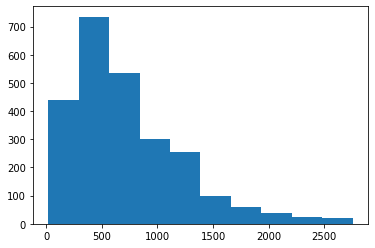

In [ ]:
# Create histogram of predictions
matplotlib.pyplot.hist(yPred)

#Description of distribution
print("Mean =",yPred.mean())

#MSE
print("MSE =",mean_squared_error([trips.trip_duration.mean()], [yPred.mean()],squared=False))

# % Error
print("% Error =",((trips.trip_duration.mean()-yPred.mean())/trips.trip_duration.mean()*100))


<h1 style="color:red;">QUESTION 4: MODEL PREDICTIONS</h1>

**Analyze the model predictions. Does the output distribution match the one you made earlier in the case study? What other features/strategies could we use to make our model even better, if we had more time?**

It is very close. The mean or average trip duration is 746.0989 seconds, while the mean from the prediction is 724.9655 seconds. This gives us an MSE of 21 seconds and percentage error of ~3%. Since the error is less than 5% I'd say this is a pretty good model. We could add features more related to the customer profile. For example, number of trips or amount of money spent on trips. This will allow us to visualize if there is any relationship between customer IDs with a lot more trips than others, or if trip duration has anything to do with the amount of money spent on trips. Customers with a lot of trips but a relative low spend with respect to others with fewer trips could potentially mean that the customer with fewer trips is traveling longer distances, and so on.

# Feature Importance

In [ ]:
# Compute feature importance of model
# You can use the feature_importances function we defined for you
# Or, see the feature_importances_ attribute of our model
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

"""
def feature_importances(model, feature_names, n=10):
    importances = model.feature_importances_
    zipped = sorted(zip(feature_names, importances), key=lambda x: -x[1])
    for i, f in enumerate(zipped[:n]):
        print("%d: Feature: %s, %.3f" % (i + 1, f[0], f[1]))
"""

feature_importances(model, featureMatrix.columns, n=20)

1: Feature: trip_distance, 0.860
2: Feature: HOUR(pickup_datetime), 0.028
3: Feature: dropoffNeighborhoods.longitude, 0.027
4: Feature: dropoffNeighborhoods.latitude, 0.021
5: Feature: HOUR(dropoff_datetime), 0.012
6: Feature: MINUTE(dropoff_datetime), 0.007
7: Feature: MINUTE(pickup_datetime), 0.006
8: Feature: pickupNeighborhoods.latitude, 0.003
9: Feature: dropoffNeighborhoods.COUNT(trips), 0.003
10: Feature: pickupNeighborhoods.SUM(trips.trip_distance), 0.003
11: Feature: pickupNeighborhoods.COUNT(trips), 0.003
12: Feature: pickupNeighborhoods.longitude, 0.003
13: Feature: dropoffNeighborhoods.SUM(trips.trip_distance), 0.002
14: Feature: pickupNeighborhoods.MEDIAN(trips.trip_distance), 0.002
15: Feature: pickupNeighborhoods.MEAN(trips.trip_distance), 0.002
16: Feature: payment_type, 0.001
17: Feature: pickupNeighborhoods.STD(trips.trip_distance), 0.001
18: Feature: dropoffNeighborhoods.SUM(trips.passenger_count), 0.001
19: Feature: pickupNeighborhoods.MEAN(trips.passenger_count), 0

<h1 style="color:red;">QUESTION 5: FEATURE IMPORTANCE</h1>

**Analyze the feature importance values you just computed above. Do they make sense? Are there any values you are surprised by? Give some brief explanations as to why these features are relevant in computing the `trip_duration` target variable.**

They make total sense and I am not surprised. I was expecting trip_distance to have the most impact on trip_duration, for obvious reasons. Even though there are variables like traffic, or multiple routes, distance on average is the main factor determining the duration of a trip. Secondly, the hour of pickup makes sense to rank second since there are particular patterns that can be drawn for customers that, for example, get in a taxi on Weekdays at 7am, which could mean they are headed to work, versus evenings which means they are headed back home or somewhere else for entertainment. I'd expect a relationship between hour of pickup and the type of trip, which influences the duration. 

<hr>

Great job! Now, make sure you check out the **Conclusion** section of the [instruction manual](https://courses.xpro.mit.edu/asset-v1:xPRO+DSx+R14+type@asset+block/4.1_instruction_manual_14.html) to wrap up this case study properly.